# Name: Vinayak Ramachandra Bhosale

# Task 2, Machine Learning with Matrix Data for Recommender Systems

In [ ]:
!pip install scikit-surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 19.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp39-cp39-linux_x86_64.whl size=3195764 sha256=f9286f3e881004134e85c11cffcccd01432f9ed9856e824b40c7694e3de4d318
  Stored in directory: /root/.cache/pip/wheels/c6/3a/46/9b17b3512bdf283c6cb84f59929cdd5199d4e754d596d22784
Successfully built scikit-surprise


In [ ]:
import pandas as pd 
from surprise import SVD
from surprise import dataset
from surprise.model_selection import cross_validate
from surprise import Reader

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [ ]:
df = pd.read_csv('/content/ratings_small.csv')
df

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
...,...,...,...,...
99999,671,6268,2.5,1065579370
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363
100002,671,6385,2.5,1070979663


In [ ]:
df = df.rename(columns={"userId": "userID", "movieId": "movieID"}, errors="raise")

df

,userID,movieID,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
...,...,...,...,...
99999,671,6268,2.5,1065579370
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363
100002,671,6385,2.5,1070979663


In [ ]:
reader = Reader(line_format='user item rating timestamp', rating_scale=(1, 5))

In [ ]:
class MyDataset(dataset.DatasetAutoFolds):

    def __init__(self, df, reader):

        self.raw_ratings = [(uid, iid, r, None) for (uid, iid, r) in
                            zip(df['userID'], df['movieID'], df['rating'])]
        self.reader=reader

df = MyDataset(df, reader)

In [ ]:
algo = SVD(n_factors = 40, biased = False)
cross_validate(algo, df, measures=['RMSE', 'MAE'], cv=5, verbose = True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9875  0.9744  0.9735  0.9817  0.9695  0.9773  0.0064  
MAE (testset)     0.7601  0.7489  0.7473  0.7535  0.7470  0.7514  0.0050  
Fit time          1.00    1.39    1.04    0.96    0.94    1.07    0.16    
Test time         0.13    0.40    0.19    0.13    0.24    0.22    0.10    


{'test_rmse': array([0.98749642, 0.97437229, 0.97353653, 0.98172344, 0.96948834]),
 'test_mae': array([0.76011755, 0.74887911, 0.74727877, 0.75347029, 0.74702541]),
 'fit_time': (1.0034449100494385,
  1.38700532913208,
  1.0403461456298828,
  0.9604387283325195,
  0.9373624324798584),
 'test_time': (0.12858843803405762,
  0.4013211727142334,
  0.18804335594177246,
  0.12866568565368652,
  0.24007773399353027)}

In [ ]:
algo = SVD(biased = False)
cross_validate(algo, df, measures=['RMSE', 'MAE'], cv=5, verbose = True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0035  1.0223  1.0058  1.0155  1.0149  1.0124  0.0069  
MAE (testset)     0.7750  0.7877  0.7778  0.7842  0.7816  0.7813  0.0045  
Fit time          2.08    1.39    1.40    1.40    1.42    1.54    0.27    
Test time         0.26    0.24    0.13    0.18    0.12    0.19    0.06    


{'test_rmse': array([1.00346887, 1.02226999, 1.00584127, 1.01549268, 1.01487238]),
 'test_mae': array([0.77502006, 0.78774254, 0.77779812, 0.78420848, 0.78158458]),
 'fit_time': (2.0756871700286865,
  1.3895015716552734,
  1.404073715209961,
  1.3993613719940186,
  1.4180822372436523),
 'test_time': (0.2629051208496094,
  0.24468469619750977,
  0.13311171531677246,
  0.17599010467529297,
  0.12298822402954102)}

In [ ]:
from surprise import KNNBasic
user_based = KNNBasic(user_based = True)

In [ ]:
cross_validate(user_based, df, measures=['RMSE', 'MAE'], cv=5, verbose = True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9702  0.9687  0.9639  0.9722  0.9688  0.9688  0.0028  
MAE (testset)     0.7446  0.7437  0.7417  0.7467  0.7447  0.7443  0.0016  
Fit time          0.11    0.16    0.24    0.13    0.13    0.15    0.04    
Test time         2.20    1.93    1.65    1.65    1.63    1.81    0.22    


{'test_rmse': array([0.97023872, 0.96872439, 0.96388016, 0.97220171, 0.96879075]),
 'test_mae': array([0.74458984, 0.74373568, 0.74167094, 0.74667925, 0.74467623]),
 'fit_time': (0.10507082939147949,
  0.15868163108825684,
  0.2352283000946045,
  0.1331005096435547,
  0.12834906578063965),
 'test_time': (2.1982967853546143,
  1.9307751655578613,
  1.6519114971160889,
  1.6452112197875977,
  1.6267671585083008)}

In [ ]:
item_based = KNNBasic(user_based = False)

In [ ]:
items_cross = cross_validate(item_based, df, measures=['RMSE', 'MAE'], cv=5, verbose = True)
items_cross

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9712  0.9643  0.9667  0.9652  0.9761  0.9687  0.0044  
MAE (testset)     0.7475  0.7403  0.7426  0.7419  0.7506  0.7446  0.0039  
Fit time          0.14    0.13    0.13    0.13    0.16    0.14    0.01    
Test time         2.04    1.70    1.52    1.67    1.53    1.69    0.19    


{'test_rmse': array([0.97116876, 0.96429498, 0.96666529, 0.9651819 , 0.97610269]),
 'test_mae': array([0.74749218, 0.74033549, 0.7425662 , 0.74189223, 0.75062218]),
 'fit_time': (0.13875198364257812,
  0.13427138328552246,
  0.13306832313537598,
  0.13350605964660645,
  0.15755033493041992),
 'test_time': (2.04335618019104,
  1.6973910331726074,
  1.5158514976501465,
  1.6726553440093994,
  1.5344951152801514)}

In [ ]:
from surprise.model_selection import GridSearchCV

param_grid = { 'sim_options': {'user_based': [True, False]},'name': ['cosine', 'MSD', 'pearson_baseline' ]}

gs_u_cf = GridSearchCV(KNNBasic, param_grid, measures = ['rmse', 'mae'], cv = 5)
gs_u_cf.fit(df)

print(gs_u_cf.best_score['rmse'])
print(gs_u_cf.best_params['rmse'])

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

cv_result = pd.DataFrame(gs_u_cf.cv_results)

cv_result


,split0_test_rmse,split1_test_rmse,split2_test_rmse,split3_test_rmse,split4_test_rmse,mean_test_rmse,std_test_rmse,rank_test_rmse,split0_test_mae,split1_test_mae,...,mean_test_mae,std_test_mae,rank_test_mae,mean_fit_time,std_fit_time,mean_test_time,std_test_time,params,param_sim_options,param_name
0,0.964965,0.965227,0.966377,0.971698,0.972120,0.968078,0.003167,4,0.741503,0.740484,...,0.744050,0.003050,4,0.124552,0.004549,1.676096,0.141213,"{'sim_options': {'user_based': True}, 'name': ...",{'user_based': True},cosine
1,0.964965,0.965227,0.966377,0.971698,0.972120,0.968078,0.003167,5,0.741503,0.740484,...,0.744050,0.003050,5,0.130448,0.019071,1.765673,0.303152,"{'sim_options': {'user_based': True}, 'name': ...",{'user_based': True},MSD
2,0.964965,0.965227,0.966377,0.971698,0.972120,0.968078,0.003167,6,0.741503,0.740484,...,0.744050,0.003050,6,0.134581,0.027543,1.811144,0.373106,"{'sim_options': {'user_based': True}, 'name': ...",{'user_based': True},pearson_baseline
3,0.935700,0.934306,0.930532,0.929679,0.943022,0.934648,0.004754,1,0.721668,0.719895,...,0.720844,0.003694,1,4.158001,0.503220,8.700527,0.723813,"{'sim_options': {'user_based': False}, 'name':...",{'user_based': False},cosine
4,0.935700,0.934306,0.930532,0.929679,0.943022,0.934648,0.004754,2,0.721668,0.719895,...,0.720844,0.003694,2,3.899742,0.112277,8.332795,0.165842,"{'sim_options': {'user_based': False}, 'name':...",{'user_based': False},MSD
5,0.935700,0.934306,0.930532,0.929679,0.943022,0.934648,0.004754,3,0.721668,0.719895,...,0.720844,0.003694,3,3.843433,0.067631,8.208773,0.077598,"{'sim_options': {'user_based': False}, 'name':...",{'user_based': False},pearson_baseline


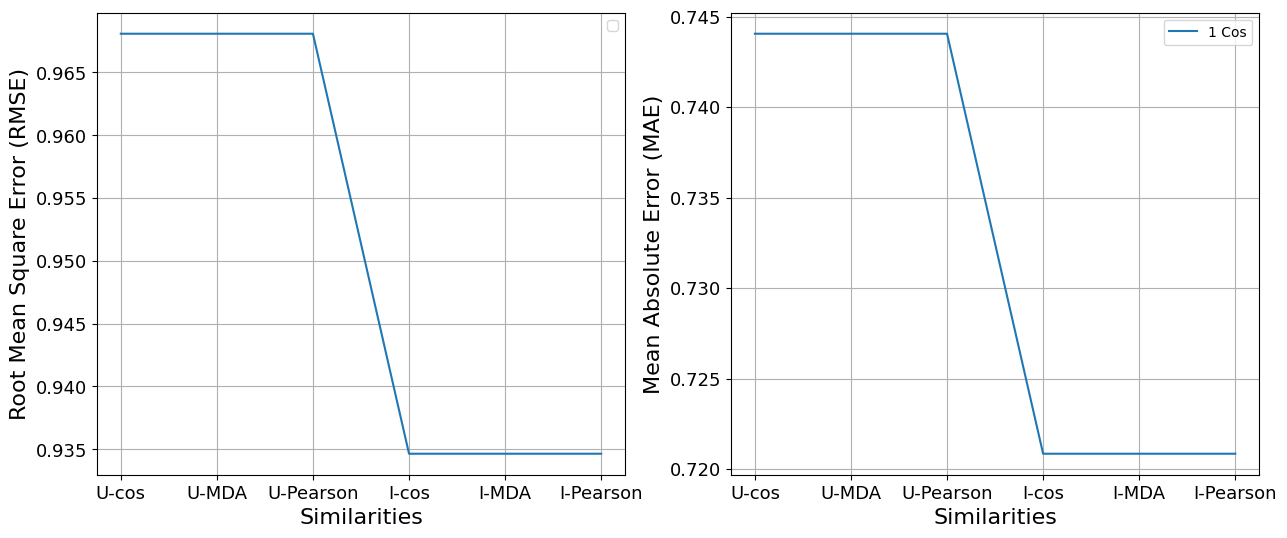

In [ ]:
fig = plt.figure(figsize=(15, 6))
plt.subplot(121)

plt.plot(cv_result['mean_test_rmse'])


plt.xticks(np.arange(6), ['U-cos', 'U-MDA', 'U-Pearson', 'I-cos', 'I-MDA', 'I-Pearson'], fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Similarities', fontsize=16)
plt.ylabel('Root Mean Square Error (RMSE)', fontsize=16)
plt.grid()
plt.legend()

plt.subplot(122)

plt.plot(cv_result['mean_test_mae'])


plt.xticks(np.arange(6), ['U-cos', 'U-MDA', 'U-Pearson', 'I-cos', 'I-MDA', 'I-Pearson'], fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Similarities', fontsize=16)
plt.ylabel('Mean Absolute Error (MAE)', fontsize=16)
plt.grid()
plt.legend(['1 Cos'])

plt.show()

In [ ]:
param_grid = { 'k': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],'sim_options': {'user_based': [True, False]}}

bestK_cf = GridSearchCV(KNNBasic, param_grid, measures = ['rmse', 'mae'], cv = 5)
bestK_cf.fit(df)

print(bestK_cf.best_score['rmse'])
print(bestK_cf.best_params['rmse'])

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

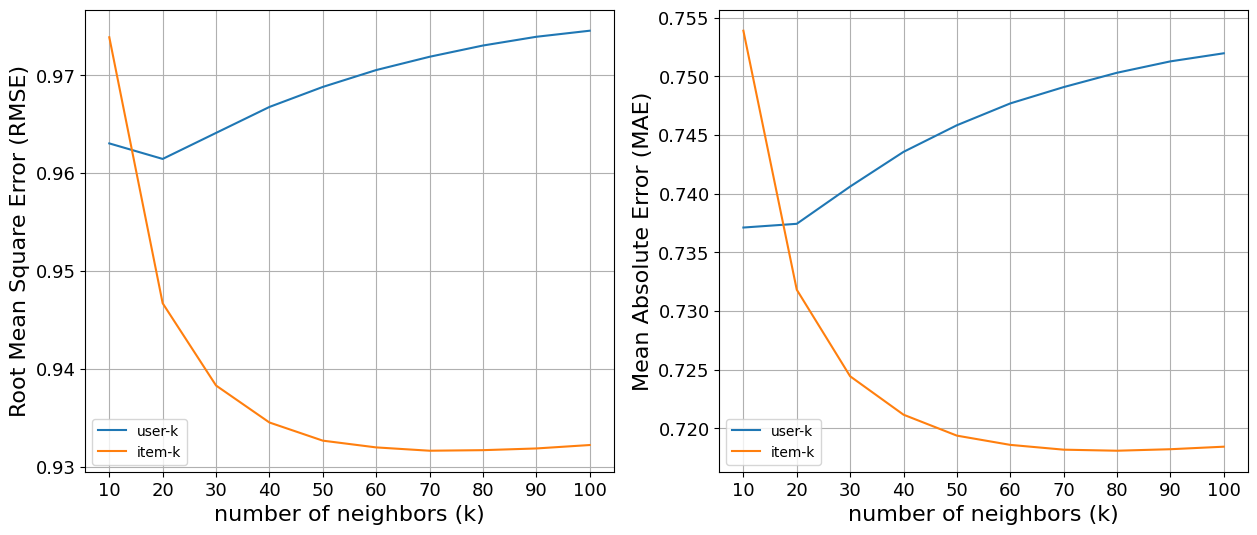

0.9316274768570935
{'k': 70, 'sim_options': {'user_based': False}}
0.7180976929720645
{'k': 80, 'sim_options': {'user_based': False}}


In [ ]:
cv_bestK_result = pd.DataFrame(bestK_cf.cv_results)

cv_bestK_result

index = np.arange(0, 20, 2)

fig = plt.figure(figsize=(15, 6))
plt.subplot(121)

plt.plot(cv_bestK_result.loc[index, 'mean_test_rmse'].tolist(), label='user-k')
plt.plot(cv_bestK_result.loc[index+1, 'mean_test_rmse'].tolist(), label='item-k')


plt.xticks(np.arange(10), np.arange(10, 110, 10), fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('number of neighbors (k)', fontsize=16)
plt.ylabel('Root Mean Square Error (RMSE)', fontsize=16)
plt.grid()
plt.legend()

plt.subplot(122)

plt.plot(cv_bestK_result.loc[index, 'mean_test_mae'].tolist(), label='user-k')
plt.plot(cv_bestK_result.loc[index+1, 'mean_test_mae'].tolist(), label='item-k')

plt.xticks(np.arange(10), np.arange(10, 110, 10), fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('number of neighbors (k)', fontsize=16)
plt.ylabel('Mean Absolute Error (MAE)', fontsize=16)
plt.grid()
plt.legend()



plt.show()

print(bestK_cf.best_score['rmse'])
print(bestK_cf.best_params['rmse'])

print(bestK_cf.best_score['mae'])
print(bestK_cf.best_params['mae'])